In [2]:
import numpy as np
from netCDF4 import Dataset
import glob
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

for file in list(glob.glob('*.nc')):
    fh = Dataset(file,'r')
    flag = fh.variables['SOL_AZIM'][:]
    lat = fh.variables['LAT_GIN'][:]
    lon = fh.variables['LON_GIN'][:]
    fh.variables.keys()
    fh.close()
    
#x,y = m(lat,lon)
    

C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


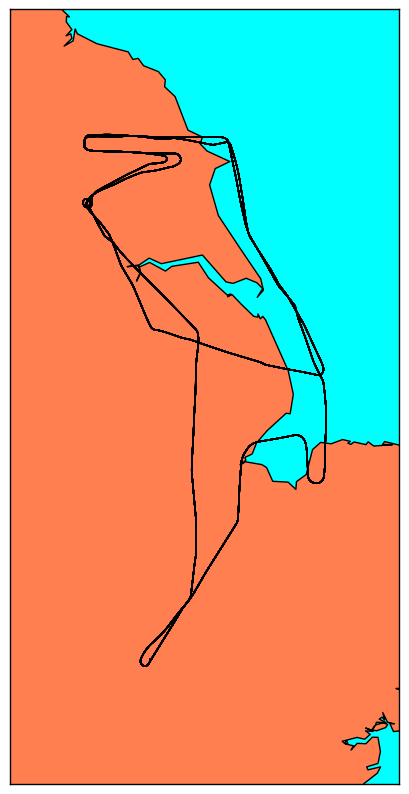

In [24]:
import numpy as np
from netCDF4 import Dataset
import glob
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math
import mplleaflet
%matplotlib inline

fh = Dataset('core_faam_20160303_v004_r0_b947.nc','r')
lat = fh.variables['LAT_GIN'][:]

lat[lat==0]=-9999
lat[lat==-9999]=['nan']
lon = fh.variables['LON_GIN'][:]
lon[lon==0]=-9999
lon[lon==-9999]=['nan']
#mois = fh.variables['NV_LWC_U'][:]
max_lat = np.nanmax(lat)
min_lat = np.nanmin(lat) 
max_lon = np.nanmax(lon) 
min_lon = np.nanmin(lon)

max_lat = max_lat +0.5
min_lat = min_lat -0.5
max_lon = max_lon +0.5
min_lon = min_lon -0.5

#plt.plot(lon,lat)
#plt.xlabel('Longtitude')
#plt.xlabel('Latitude')
#plt.title('Flight Path: Skegness')
#print(max_lat)
#print(min_lat)
#print(max_lon)
#print(min_lon)

fig=plt.figure(figsize=(14, 10), dpi= 200, facecolor='w', edgecolor='k')
m = Basemap(llcrnrlon=min_lon,llcrnrlat=min_lat,urcrnrlon=max_lon,urcrnrlat=max_lat, resolution='i', projection='merc', lat_0 = 40., lon_0 = -80)
m.drawcoastlines()
m.drawmapboundary(fill_color='aqua') 
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
parallels = np.arange(0.,81,10.)

x,y = m(lon,lat)
m.plot(x,y,'k',label='Flight Path')

plt.show()

C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


0.0


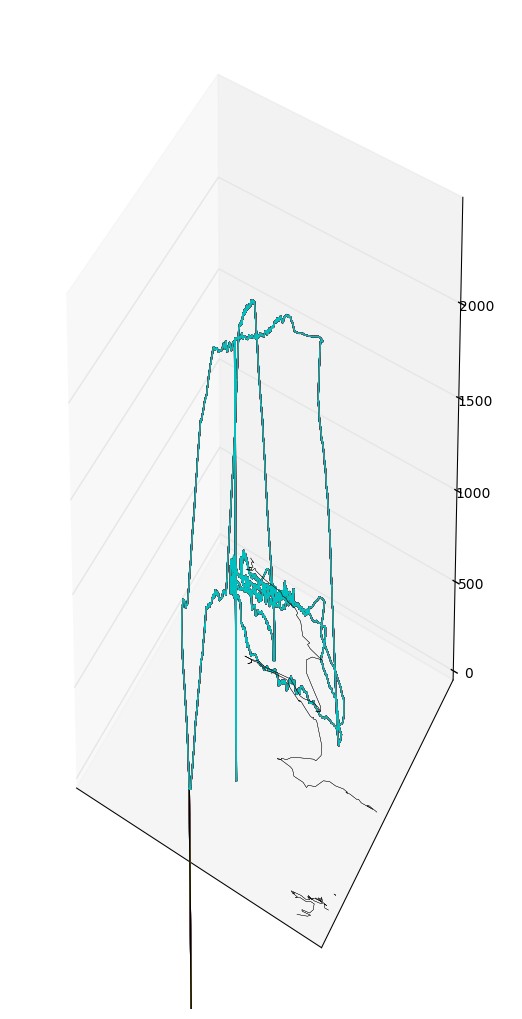

In [65]:
import numpy as np
from netCDF4 import Dataset
import glob
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math
import mplleaflet
%matplotlib inline

fh = Dataset('core_faam_20160303_v004_r0_b947.nc','r')
lat = fh.variables['LAT_GIN'][:]

lat[lat==0]=-9999
lat[lat==-9999]=['nan']
lon = fh.variables['LON_GIN'][:]
lon[lon==0]=-9999
lon[lon==-9999]=['nan']
alt = fh.variables['HGT_RADR'][:]
alt = alt[:,1]
alt[alt==-9999]=['nan']
#mois = fh.variables['NV_LWC_U'][:]
max_lat = np.nanmax(lat)
min_lat = np.nanmin(lat) 
max_lon = np.nanmax(lon) 
min_lon = np.nanmin(lon)

max_lat = max_lat +0.5
min_lat = min_lat -0.5
max_lon = max_lon +0.5
min_lon = min_lon -0.5
max_alt =(np.nanmax(alt))
print(np.nanmin(alt))
fig=plt.figure(figsize=(14, 10), dpi= 200, facecolor='w', edgecolor='k')
ax = Axes3D(fig)
#ax = fig.gca(projection='3d')

#ax.azim = 270
#ax.elev = 45
#ax.dist = 10

m = Basemap(llcrnrlon=min_lon,llcrnrlat=min_lat,urcrnrlon=max_lon,urcrnrlat=max_lat, resolution='i', projection='merc', lat_0 = 40., lon_0 = -80)
x,y = m(lon,lat)
ax.add_collection3d(m.drawcoastlines(linewidth=0.25))
ax.add_collection3d(m.drawcountries(linewidth=0.25))
ax.plot(x,y,zs=alt)
ax.set_zlim([0,max_alt])

plt.show()

C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


0.0
25006
100


C:\Users\Ben\Anaconda3\lib\site-packages\numpy\ma\core.py:3117: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dout = self.data[indx]
C:\Users\Ben\Anaconda3\lib\site-packages\numpy\ma\core.py:3172: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dout._mask = _mask[indx]


IndexError: index 100 is out of bounds for axis 0 with size 100

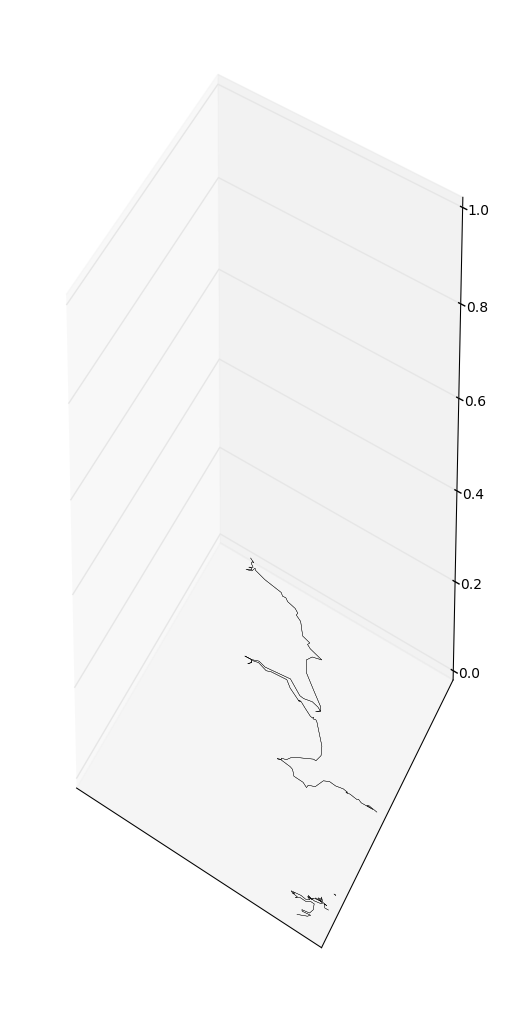

In [1]:
import numpy as np
from netCDF4 import Dataset
import glob
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math
import mplleaflet
%matplotlib inline

fh = Dataset('core_faam_20160303_v004_r0_b947.nc','r')
lat = fh.variables['LAT_GIN'][:]

lat[lat==0]=-9999
lat[lat==-9999]=['nan']
lon = fh.variables['LON_GIN'][:]
lon[lon==0]=-9999
lon[lon==-9999]=['nan']
alt = fh.variables['HGT_RADR'][:]
alt = alt[:,1]
alt[alt==-9999]=['nan']
#mois = fh.variables['NV_LWC_U'][:]
max_lat = np.nanmax(lat)
min_lat = np.nanmin(lat) 
max_lon = np.nanmax(lon) 
min_lon = np.nanmin(lon)

max_lat = max_lat +0.5
min_lat = min_lat -0.5
max_lon = max_lon +0.5
min_lon = min_lon -0.5
max_alt =(np.nanmax(alt))
print(np.nanmin(alt))

#ax = fig.gca(projection='3d')
print(len(alt))
#ax.azim = 270
#ax.elev = 45
#ax.dist = 10


time_spacer = np.linspace(1,25007,100)
print(len(time_spacer))
for i in range(1,101):
    fig=plt.figure(figsize=(14, 10), dpi= 200, facecolor='w', edgecolor='k')
    ax = Axes3D(fig)
    m = Basemap(llcrnrlon=min_lon,llcrnrlat=min_lat,urcrnrlon=max_lon,urcrnrlat=max_lat, resolution='i', projection='merc', lat_0 = 40., lon_0 = -80)
    ax.add_collection3d(m.drawcoastlines(linewidth=0.25))
    ax.add_collection3d(m.drawcountries(linewidth=0.25))
    get = time_spacer[i]
    x,y = m(lon,lat)
    ax.plot(x[1:get],y[1:get],zs=alt[1:get])
    ax.set_zlim([0,max_alt])
    save_string = 'plot' + str(i) + '.png'
    plt.savefig(save_string)
    plt.close()

In [ ]:
import numpy as np
from netCDF4 import Dataset
import glob
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math
import mplleaflet
%matplotlib inline

fh = Dataset('core_faam_20160303_v004_r0_b947.nc','r')
lat = fh.variables['LAT_GIN'][:]

lat[lat==0]=-9999
lat[lat==-9999]=['nan']
lon = fh.variables['LON_GIN'][:]
lon[lon==0]=-9999
lon[lon==-9999]=['nan']
alt = fh.variables['HGT_RADR'][:]
alt = alt[:,1]
alt[alt==-9999]=['nan']
#mois = fh.variables['NV_LWC_U'][:]
max_lat = np.nanmax(lat)
min_lat = np.nanmin(lat) 
max_lon = np.nanmax(lon) 
min_lon = np.nanmin(lon)

max_lat = max_lat +0.5
min_lat = min_lat -0.5
max_lon = max_lon +0.5
min_lon = min_lon -0.5
max_alt =(np.nanmax(alt))
print(np.nanmin(alt))

#ax = fig.gca(projection='3d')
print(len(alt))
#ax.azim = 270
#ax.elev = 45
#ax.dist = 10
xlist = ()
ylist = ()

time_spacer = np.linspace(1,25007,100)
print(len(time_spacer))
for i in range(1,101):
    fig=plt.figure(figsize=(14, 10), dpi= 200, facecolor='w', edgecolor='k')
    ax = Axes3D(fig)
    m = Basemap(llcrnrlon=min_lon,llcrnrlat=min_lat,urcrnrlon=max_lon,urcrnrlat=max_lat, resolution='i', projection='merc', lat_0 = 40., lon_0 = -80)
    ax.add_collection3d(m.drawcoastlines(linewidth=0.25))
    ax.add_collection3d(m.drawcountries(linewidth=0.25))
    get = time_spacer[i]
    x,y = m(lon,lat)
    ax.plot(x[1:get],y[1:get],zs=alt[1:get])
    ax.set_zlim([0,max_alt])
    save_string = 'plot' + str(i) + '.png'
    plt.savefig(save_string)
    plt.close()

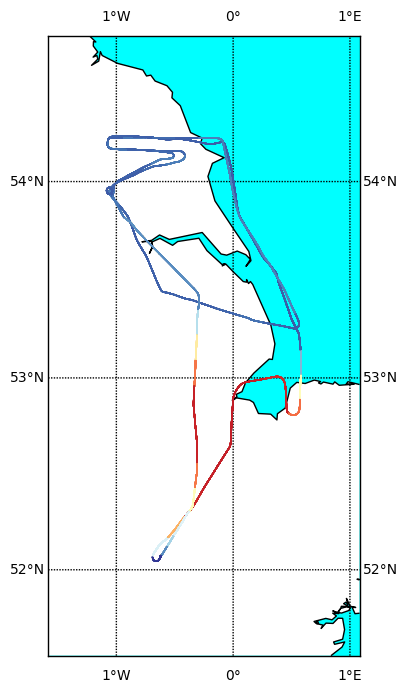

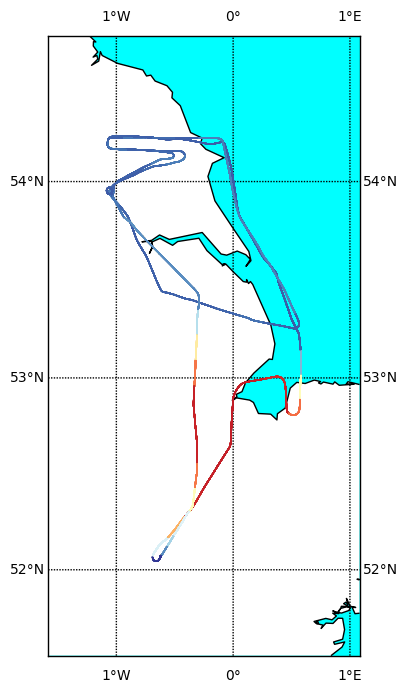

In [57]:
import numpy as np
from netCDF4 import Dataset
import glob
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math
import mplleaflet
from IPython import display
import pylab as pl
import time
%matplotlib inline

fh = Dataset('core_faam_20160303_v004_r0_b947.nc','r')
lat = fh.variables['LAT_GIN'][:]

lat[lat==0]=-9999
lat[lat==-9999]=['nan']
lon = fh.variables['LON_GIN'][:]
lon[lon==0]=-9999
lon[lon==-9999]=['nan']

alt = fh.variables['HGT_RADR'][:]
alt = alt[:,1]
alt[alt==-9999]=['nan']
#mois = fh.variables['NV_LWC_U'][:]
max_lat = np.nanmax(lat)
min_lat = np.nanmin(lat) 
max_lon = np.nanmax(lon) 
min_lon = np.nanmin(lon)

#lon_f = lon[(np.isnan(lon)==False)]
#lat_f = lat[(np.isnan(lat)==False)]
#alt_f = alt[(np.isnan(alt)==False)]
#lon = lon[np.logical_not(np.isnan(lon))]
#lat = lat[np.logical_not(np.isnan(lat))]
#alt = alt[np.logical_not(np.isnan(alt))]

max_lat = max_lat +0.5
min_lat = min_lat -0.5
max_lon = max_lon +0.5
min_lon = min_lon -0.5
max_alt =(np.nanmax(alt))
print(np.nanmin(alt))

fig=plt.figure(figsize=(12, 8), dpi= 200, facecolor='w', edgecolor='k')
m = Basemap(llcrnrlon=min_lon,llcrnrlat=min_lat,urcrnrlon=max_lon,urcrnrlat=max_lat, resolution='i', projection='merc', lat_0 = 40., lon_0 = -80)
m.drawcoastlines()
m.drawmapboundary(fill_color='aqua') 
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='white',lake_color='aqua')
m.drawparallels(np.arange(50.,58.,1.),labels=[True,True,True,True])
m.drawmeridians(np.arange(-2.,2.,1.),labels=[True,True,True,True])

#airfield_lon = lon_f[1]
#airfield_lat = lat_f[1]
#x,y = map(airfield_lon, airfield_lat)
#map.plot(x, y, 'bo', markersize=24)

time_spacer = np.linspace(1,25007,200)
counter = 0
for i in range(100,199):
    get = time_spacer[i]
    get2 = time_spacer[i+1]
    x, y = m(lon,lat)
    alt_color = alt[get]/np.nanmax(alt)
    pl.plot(x[get:get2],y[get:get2],color=plt.cm.RdYlBu(1-alt_color))
    display.clear_output(wait=True)
    display.display(pl.gcf())